<a href="https://colab.research.google.com/github/NirangaNiluminda/Human-Action-Recognition/blob/main/Action_Regonition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:

!pip install pafy youtube-dl moviepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.5 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf

from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model


  if event.key is 'enter':



In [ ]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)


# Download and visualized the data set

In [ ]:
!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar

!unrar x UCF50.rar

Streaming output truncated to the last 5000 lines.
Extracting  UCF50/HorseRace/v_HorseRace_g16_c03.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g16_c04.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g16_c05.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c01.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c02.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c03.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c04.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c05.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g18_c01.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g18_c02.avi                       23%  OK 
Extracting  UCF50/HorseRace/v

['Drumming', 'SalsaSpin', 'Skijet', 'TrampolineJumping', 'Skiing', 'TaiChi', 'MilitaryParade', 'Mixing', 'JugglingBalls', 'RockClimbingIndoor', 'Biking', 'YoYo', 'Lunges', 'PlayingPiano', 'PizzaTossing', 'Rowing', 'HulaHoop', 'PlayingTabla', 'HighJump', 'Fencing', 'Kayaking', 'Nunchucks', 'Swing', 'HorseRiding', 'PommelHorse', 'Billiards', 'VolleyballSpiking', 'PoleVault', 'PushUps', 'BreastStroke', 'JumpRope', 'PlayingViolin', 'WalkingWithDog', 'HorseRace', 'BaseballPitch', 'Diving', 'SkateBoarding', 'TennisSwing', 'GolfSwing', 'JavelinThrow', 'Punch', 'RopeClimbing', 'PlayingGuitar', 'CleanAndJerk', 'JumpingJack', 'Basketball', 'BenchPress', 'PullUps', 'SoccerJuggling', 'ThrowDiscus']
[47, 2, 43, 33, 5, 10, 29, 9, 16, 34, 3, 11, 0, 28, 42, 22, 26, 4, 19, 14]


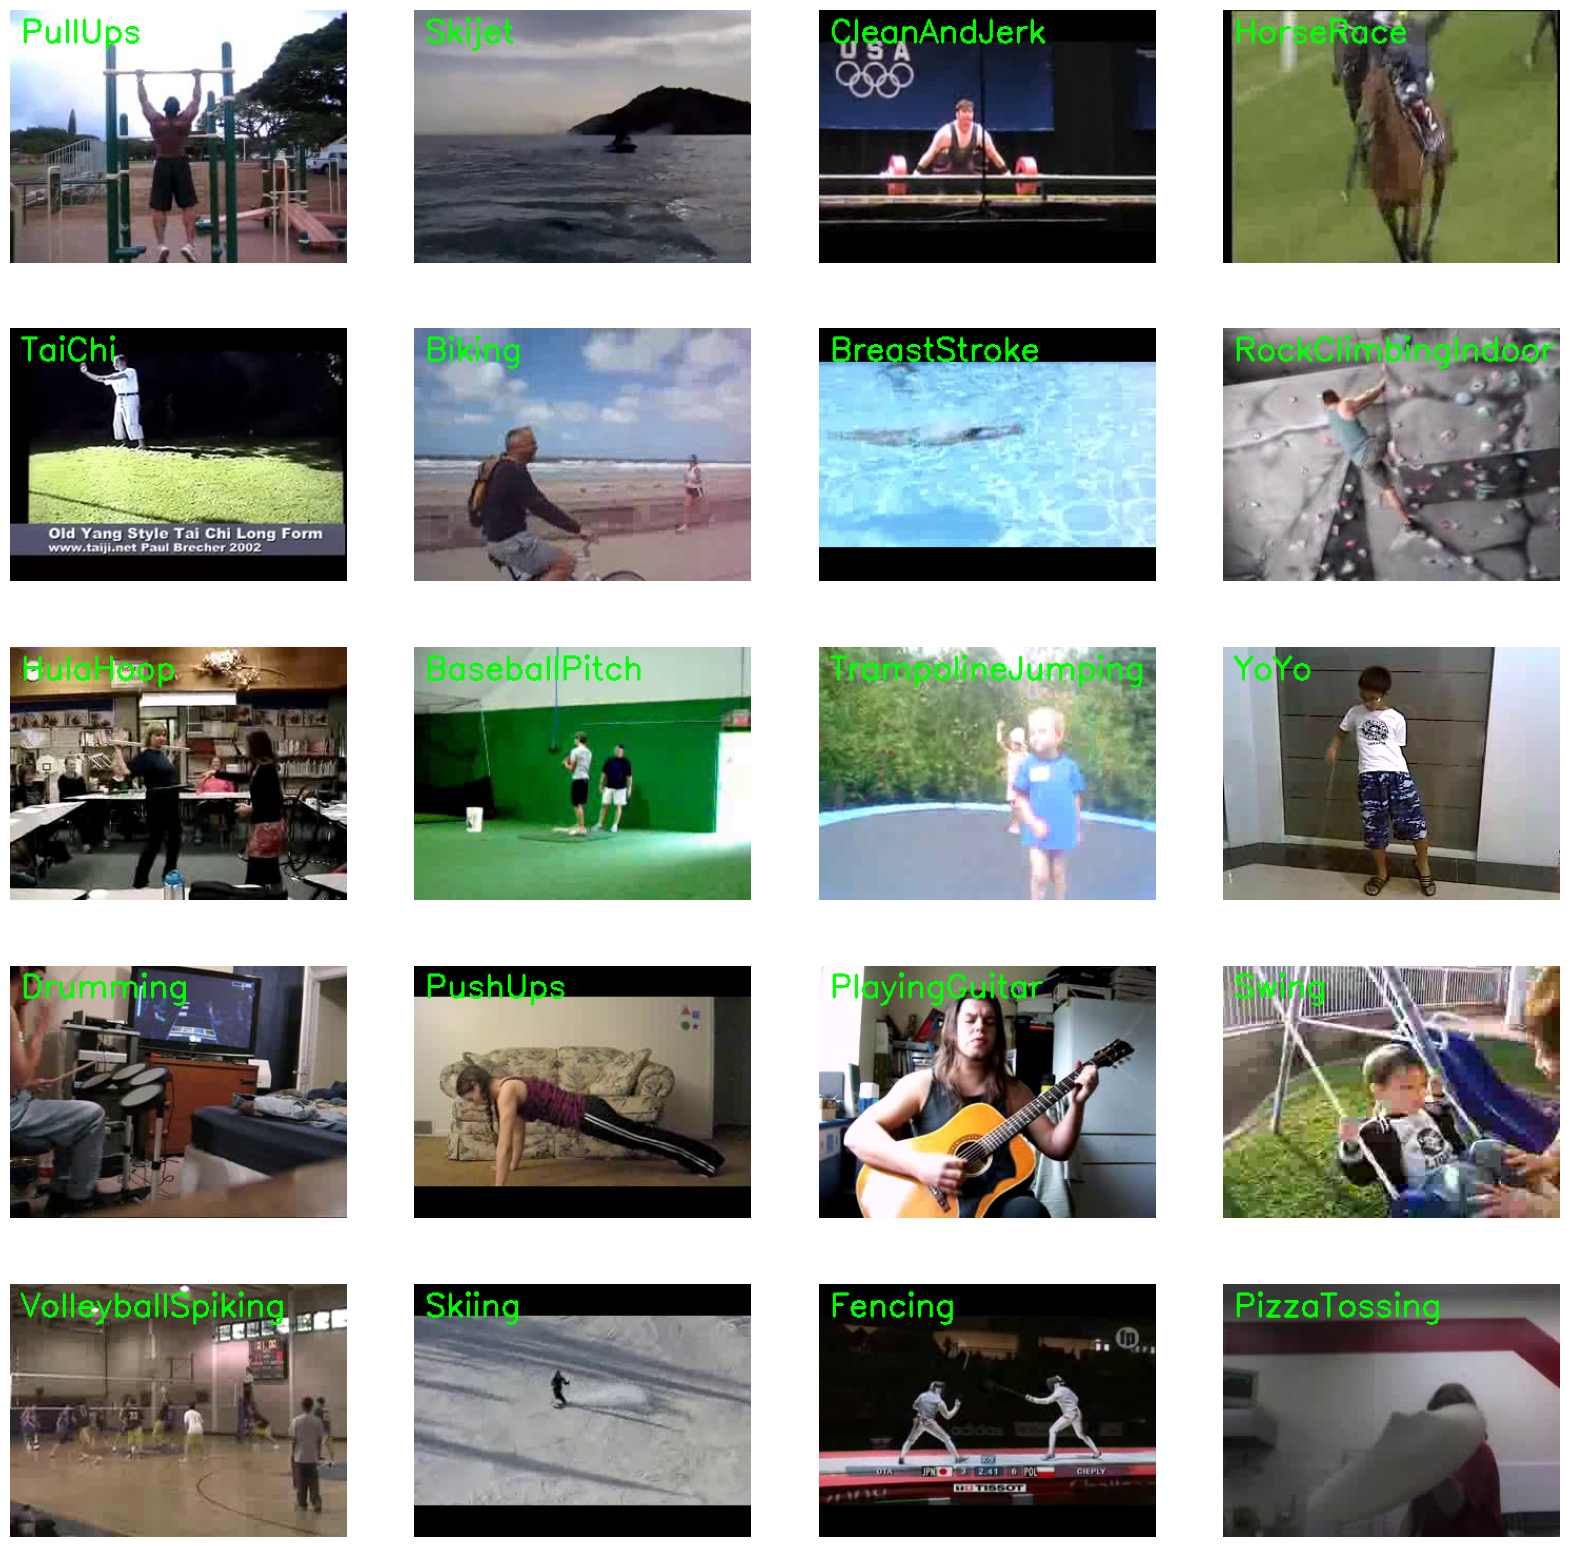

In [9]:
plt.figure(figsize = (20, 20));

all_classes_names = os.listdir('UCF50');
print(all_classes_names);
random_range = random.sample(range(len(all_classes_names)), 20);
print(random_range);

for counter, random_index in enumerate(random_range, 1):
    selected_class_Name = all_classes_names[random_index];

    video_files_names_list = os.listdir(f'UCF50/{selected_class_Name}');

    selected_video_file_name = random.choice(video_files_names_list);

    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_Name}/{selected_video_file_name}');

    _, bgr_frame = video_reader.read();

    video_reader.release();

    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB);

    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1 , (0, 255, 0), 2);

    plt.subplot(5,4, counter);
    plt.imshow(rgb_frame);
    plt.axis('off');


# Preprocess the dataset

In [ ]:
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 20
DATASET_DIR = 'UCF50'
CLASSES_LIST = ['WalkingWithDog', 'TaiChi', 'Swing', 'HorseRace']